<a href="https://colab.research.google.com/github/duneag2/intro-dl/blob/main/Assignment2/Uihwan/reass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Matplotlib 라이브러리를 사용하여 그래프를 그릴 때, 그린 그래프를 바로 노트북 내에 표시해주는 매직 명령어

numpy: 파이썬에서 수치계산 할 때 쓰는 패키지  
matplotlib: 파이썬의 데이터 시각화 라이브러리   
모듈: 특정 기능을 수행하는 단위 (함수+클래스+변수)  
패키지: 모듈을 모아둔 것    
라이브러리: 모듈, 패키지 모두 함쳐서 부르는 말

In [3]:
# Let's make a linear function
def make_linear(w=0.5, b=0.8, size=50, noise=1.0): ## This is a 'function' name 'make_linear' - we're going to use this function later on
    x = np.random.rand(size) # random x. 0과 1 사이 50개 난수 생성(넘파이 배열)
    y = w * x + b # y=wx+b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # -noise(1)~+noise(1) random noise. 모든 위치에 균일하게
    # rand: 0~1, uniform: 지정 범위.
    yy = y + noise # adding random noise to y
    plt.figure(figsize=(10, 7)) # plotting the figure - figure size
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}') # plot x in x-axis, y in y-axis, and label -- line plot
    # 연결한 선 그려줌. 1차함수니까 직선 나오는 거.
    plt.scatter(x, yy, label='data') ## plot x in x-axis, yy (y+noise) in y-axis -- scatter plot
    plt.legend(fontsize=20) ## setting legend's fontsize
    plt.show()
    print(f'w: {w}, b: {b}')
    print(f'min(yy): {min(yy)}, max(yy): {max(yy)}')
    return x, yy ## The function make_linear will return the value x and yy in the end

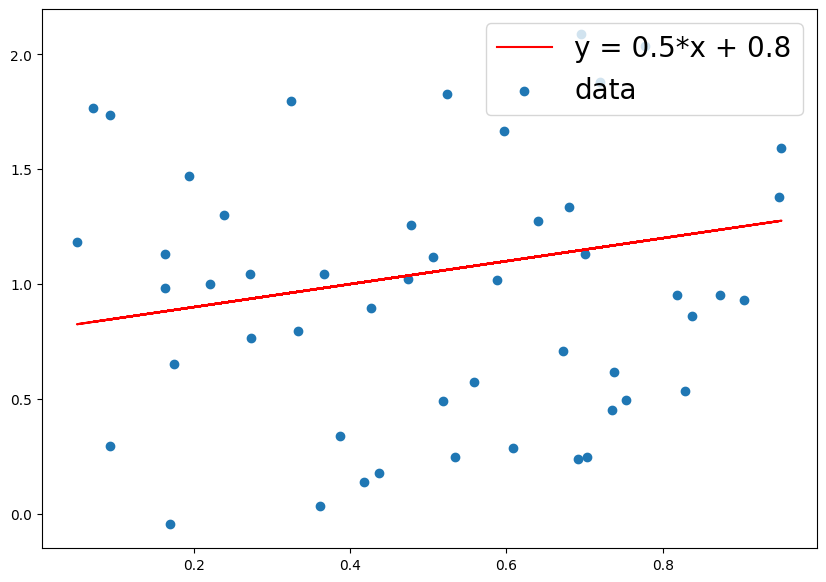

w: 0.5, b: 0.8
min(yy): -0.04296384381945928, max(yy): 2.0892664240524628


(array([0.67243091, 0.22128767, 0.90370666, 0.7031915 , 0.53383285,
        0.73492115, 0.41770062, 0.27167312, 0.19399585, 0.94806849,
        0.09252632, 0.47733212, 0.36698823, 0.23842787, 0.87323308,
        0.36165317, 0.72001038, 0.64037068, 0.67970864, 0.83675549,
        0.82803086, 0.69503431, 0.07134293, 0.42718818, 0.51937562,
        0.16323284, 0.75350518, 0.16280021, 0.17433926, 0.43697838,
        0.77689028, 0.09229101, 0.81825337, 0.69121654, 0.95184166,
        0.17016477, 0.47395965, 0.50618747, 0.38660383, 0.33370753,
        0.5881055 , 0.60802858, 0.55895802, 0.59634383, 0.73788833,
        0.52382777, 0.05053641, 0.32489722, 0.27365931, 0.70000718]),
 array([ 0.70926594,  0.99922149,  0.93228517,  0.24923892,  0.24751499,
         0.45389472,  0.13921488,  1.04309231,  1.4699318 ,  1.38021735,
         1.73793998,  1.25530113,  1.04313602,  1.30123977,  0.95059587,
         0.03272139,  1.87899089,  1.27299152,  1.33337172,  0.86007343,
         0.53320622,  2.08

In [4]:
make_linear()
# x: 0~1 사이의 난수 50개 배열
# y: x의 각 값에 X0.5,+0.8한 배열
# noise: -1~1 사이 난수 50개 배열
# yy: 0.8~1.3 에다가 noise 더함. -0.2까지 내려갈 수도 있고 1.3까지 올라갈 수도 있는데 둘 다 어느정도 나왔네
# 리턴값 자동 프린트

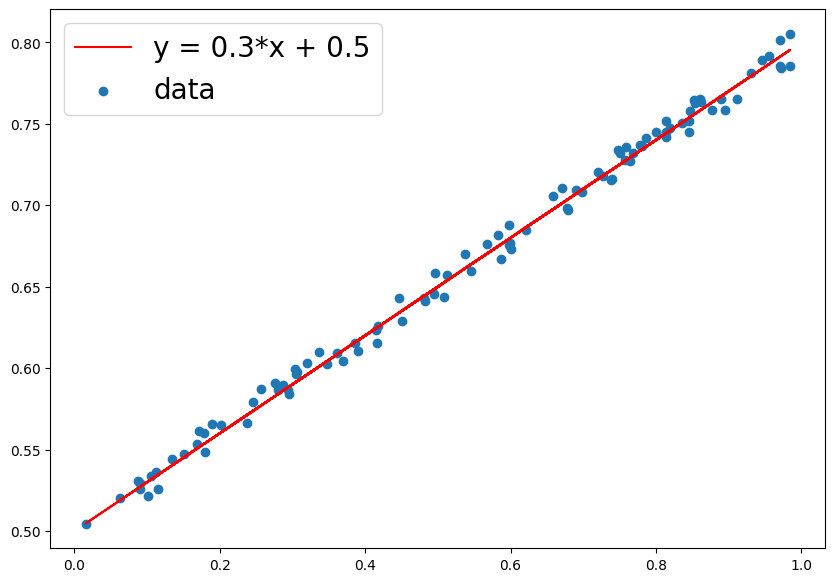

w: 0.3, b: 0.5
min(yy): 0.5044168290398079, max(yy): 0.8052381547133927


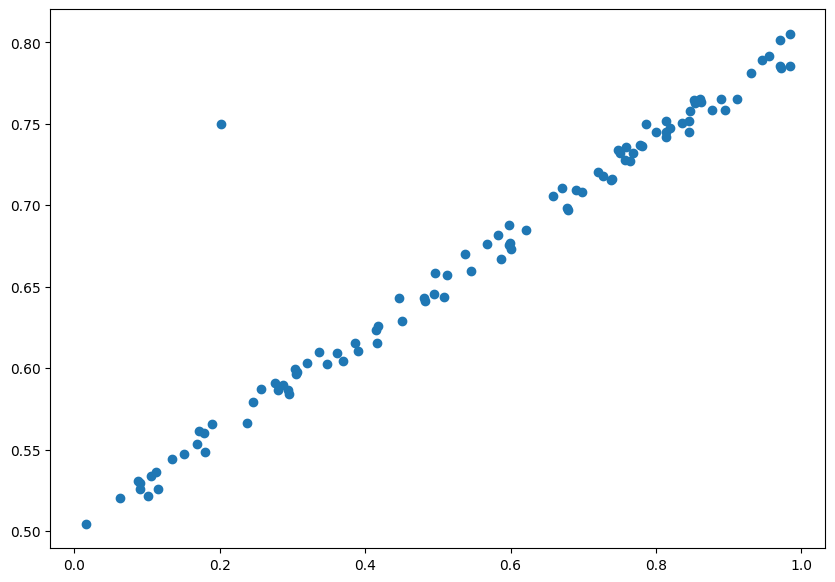

In [5]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01) ## Here we use the function make_linear -> first figure: line + scatter plot

## Intentionally making 1 outlier
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y) ## second figure: only scatter plot
plt.show()

In [6]:
## randomly choose w and b
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

In [8]:
## y_hat: prediction
y_hat = w * x + b

## Loss function
error = (y_hat - y) ** 2
print(error)

[5.96336418e-02 3.34377814e-03 9.84711198e-02 3.04336356e-03
 2.00460741e-02 3.77444106e-02 1.50313070e-02 1.02013442e-01
 7.77364971e-03 4.52099502e-02 1.34584946e-01 7.70556039e-02
 1.11698683e-01 8.38122862e-02 3.32994302e-02 3.47034127e-04
 3.30431269e-02 6.38955084e-03 3.29181182e-02 5.19738732e-02
 5.08469174e-02 3.83450433e-02 6.18328361e-02 4.08288841e-02
 5.07863746e-02 8.61819257e-03 2.14326724e-03 5.92076775e-02
 2.98659585e-02 7.35471498e-03 6.69588175e-05 7.43221868e-02
 1.41415278e-02 1.07966484e-01 5.76543024e-02 9.06717231e-02
 4.54221075e-05 2.79309809e-03 9.40380392e-02 4.49055950e-02
 1.14117186e-02 1.22143568e-03 9.51882683e-03 2.36035006e-02
 3.46905014e-02 3.64328150e-03 3.98624897e-02 1.32211698e-02
 1.26080651e-03 1.56053933e-02 5.85671071e-02 6.06689062e-04
 5.19597402e-02 1.22605216e-02 3.80544364e-02 1.29999231e-02
 1.02693593e-02 6.36218067e-02 8.96533458e-02 1.31357666e-02
 1.15526337e-03 3.77531657e-02 2.23039576e-02 6.57116012e-02
 4.29516215e-02 5.526470

In [ ]:
## Quick Question
## (1) Write a name of the loss function above. HInt: _ _ _ Loss

## (2) Is it okay to use 'error = (y_hat-y)' or 'error = np.abs(y_hat-y)'?
## Write your own answer and justify your choice.

## Your Answer
## (1) 스퀘어????

## (2) 뒤에거는 MAE니까 원래 많이 쓰고, 앞에 거는 에러를 값이 양수일지 음수일지 모르니까 줄여야할지 늘려야할지 몰라서 쓰기 어려울 것 같습니다.

In [9]:
# Epoch (# of iterations)
num_epoch = 5000

# Learning rate
learning_rate = 0.5

In [ ]:
## Quick Question
## (1) What is epoch? Google it and write your own answer in detail.
## (2) What is learning rate? Google in and write your own answer.

## Your Answer
## (1) 모든 학습 데이터를 한 번 학습시키는 과정. 만약 학습 데이터가 1000개이고, Batch size가 100이라면, 1 Epoch 동안 모델은 학습 데이터를 10번 순회하게 됩니다. 즉, 10번의 Iteration이 발생합니다.

## (2) 가중치를 한 번에 얼마나 크게 조정할지 결정하는 값.

In [19]:
## Question 1
errors = []   # 빈 리스트 생성
# w, b: random initialization -- result may vary each time you execute the code
w = np.random.uniform(low=-1.0, high=1.0)   # -1에서 1 사이 랜덤 변수  1개 생성  (할거임(호출되면))  -> 아닌데? 이미 실행돼서 값이 저장돼있는데?
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):     # 5000번 시행.
    y_hat = x * w + b         # x: 0~1값의 size 50 벡터. 모두 같은 w, b값 적용.

    error = ((y_hat - y)**2).mean()    # mse 계산
    if error < 0.0005:       # 에러가 저만큼 작아지면 5000번 다 채우지 말고 그만
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()       # gd로 parameter 업데이트
    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error)     # 에러 기록

    if epoch % 5 == 0:             # 5번 마다 에포크, w, b, error 출력
        print("{0:2} / w = {1:.5f} / b = {2:.5f} / error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)   # 보기쉽게 줄 긋기
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))   # 최종 결과 쓰기

 0 / w = 0.60665 / b = -0.03616 / error = 1.12165
 5 / w = 0.69656 / b = 0.27031 / error = 0.01434
10 / w = 0.64044 / b = 0.30462 / error = 0.01069
15 / w = 0.59156 / b = 0.33307 / error = 0.00801
20 / w = 0.54951 / b = 0.35754 / error = 0.00602
25 / w = 0.51335 / b = 0.37859 / error = 0.00456
30 / w = 0.48224 / b = 0.39669 / error = 0.00347
35 / w = 0.45548 / b = 0.41227 / error = 0.00267
40 / w = 0.43247 / b = 0.42566 / error = 0.00207
45 / w = 0.41267 / b = 0.43718 / error = 0.00163
50 / w = 0.39565 / b = 0.44709 / error = 0.00131
55 / w = 0.38100 / b = 0.45561 / error = 0.00106
60 / w = 0.36840 / b = 0.46294 / error = 0.00089
65 / w = 0.35757 / b = 0.46925 / error = 0.00075
70 / w = 0.34825 / b = 0.47467 / error = 0.00066
75 / w = 0.34023 / b = 0.47934 / error = 0.00059
80 / w = 0.33334 / b = 0.48335 / error = 0.00053
------------------------------------------------------------
84 w = 0.3, b = 0.5 error = 0.00050


x, y를 똑같이 쓰고, w, b만 바꿨으니 가능한 학습 결과.

### 2. Let's practice numpy

In [20]:
import numpy as np ## np: abbreviation of numpy (convention)

In [22]:
arr = np.array([1,2,3]) # numpy array
print(arr)

[1 2 3]


In [23]:
arr2 = np.array([[1,2,3], [4,5,6]]) # numpy array
print(arr2)

[[1 2 3]
 [4 5 6]]


In [24]:
arr3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Quick Question (Optional)
https://datascienceschool.net/01%20python/03.01%20%EB%84%98%ED%8C%8C%EC%9D%B4%20%EB%B0%B0%EC%97%B4.html   
Read and summarize the document above.

넘파이 배열에 대한 기본적인 내용.

In [25]:
## Let's check their data type
## numpy.ndarray (n*d array)
print(type(arr))
print(type(arr2))
print(type(arr3))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
## .shape returns the shape of the numpy array
print(arr.shape) # (3, ) -> because it's 1d array (vector)
print(arr2.shape) # matrix
print(arr3.shape) # matrix

(3,)
(2, 3)
(3, 3)


In [27]:
## How to make numpy array more conveniently?
print(np.ones((2,3))) ## ONES!!
print(2*np.ones((2,3))) ## TWOS!!

[[1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [28]:
print(np.zeros((2,3))) ## ZEROS!!
## Of course...
print(0*np.ones((2,3))) ## ZEROS!!

[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [29]:
## Reshaping numpy array
arr12 = np.ones((3,4))
arr12.reshape(1, 12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [30]:
## But what if we do not know (or do not want to know; it's lazy... but anyway) the exact size of numpy array?
## Use -1

arr12.reshape(-1, 12) ## same result!

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [31]:
## It's quite obvious but...
arr12.reshape(-1, 5) ## this does not work

ValueError: cannot reshape array of size 12 into shape (5)

In [32]:
## Sorting the values
arr_mixed = np.array([1,5,2,3])  # 리스트를 넘파이 배열로.
print(np.sort(arr_mixed))   # 오름차순 정렬

[1 2 3 5]


### Question 2. Sorting with numpy

(1) We've just sorted the vector in increasing order. Can you sort the same vector in decreasing order?

In [34]:
print(np.flip(np.sort(arr_mixed)))

[5 3 2 1]


(2) Read the document for np.argsort (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html). Explain the numpy argsort function and execute the code with arr_mixed.

오름차순 정렬 후 원래 인덱스 리턴

In [35]:
print(np.argsort(arr_mixed))

[0 2 3 1]


In [36]:
## Indexing
arr4 = np.array([5,2,3,4,6])
print(arr4[1]) ## index starts with 0

2


In [37]:
## Slicing
arr4[1:3] ## Including 1st entry, excluding 3rd entry

array([2, 3])

In [ ]:
## Quick Question
## Write a code that slices arr4 from 1st entry to 4th entry. HInt: including 1st entry, excluding 5th entry

## Your Answer :  arr4[0:4]

## 3. Let's practice matplotlib

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# this command let us view the figure in the jupyter notebook directly

[1, 2, 3]


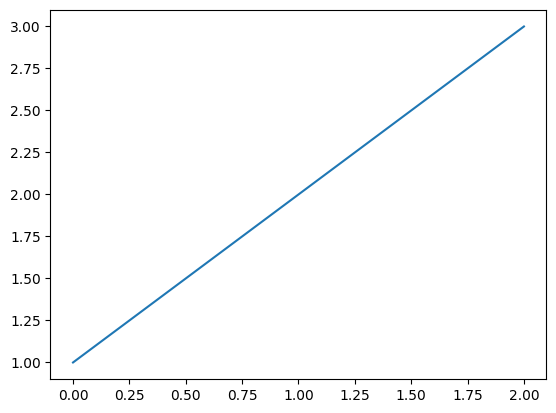

In [39]:
x = [1, 2 , 3]
print(x) # list with 1, 2, and 3
plt.plot(x) # matplotlib regard this as y-axis: 1, 2, 3 (the value given) -> corresponding x-axis: 0, 1, 2 (starting from 0, having 3 elements)
# x축은 인덱스, y축은 값을 사용.

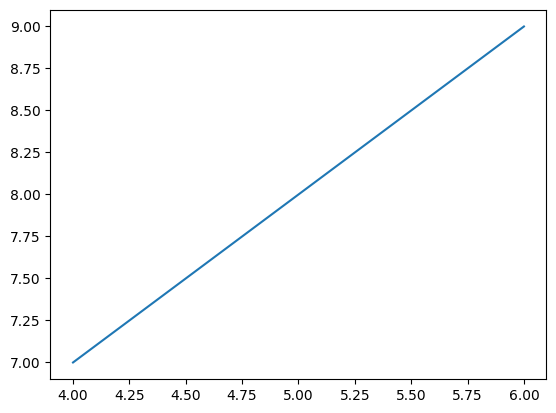

In [42]:
## But what if we specify the elements of x-axis?
x = [4, 5, 6]
y = [7, 8, 9]
plt.plot(x, y)

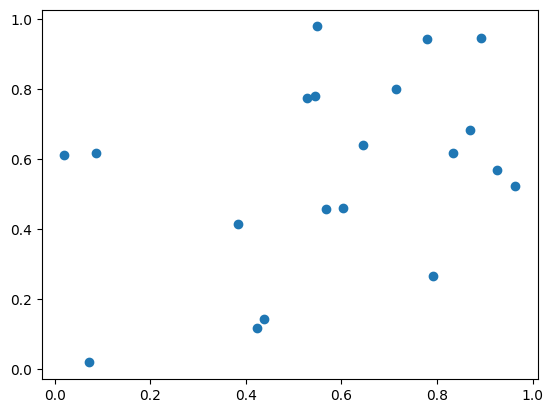

In [55]:
# We can also draw a scatter plot
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)  # 없으면 시간 같은 걸 써서 시작점을 잡는데, 저렇게 시작점을 잡아줘 버리면 같은 난수(?)가 생성,

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.show()

<ipython-input-59-4b04690393de>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.5, cmap='viridis') ## alpha? cmap?


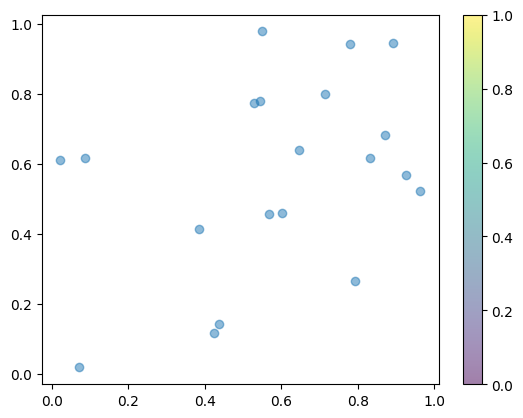

In [59]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.5, cmap='viridis') ## alpha? cmap?
plt.colorbar()
plt.show()

### Question 3. Matplotlib

(1) What is alpha and cmap above? Google it and write the answer.   
마커 투명도, 색깔

(2) Write and execute a code that has alpha=0.1. Can you see the difference?   
더 투명해짐


<ipython-input-62-d9416fe4bc5e>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.1, cmap='viridis') ## alpha? cmap?


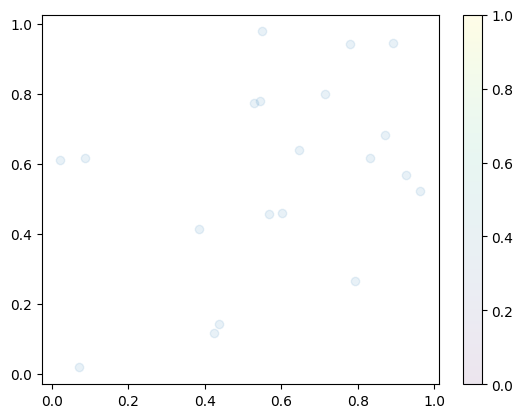

In [62]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.1, cmap='viridis') ## alpha? cmap?
plt.colorbar()
plt.show()

(3) Check the type of cmap and run the code that changed the type of cmap.

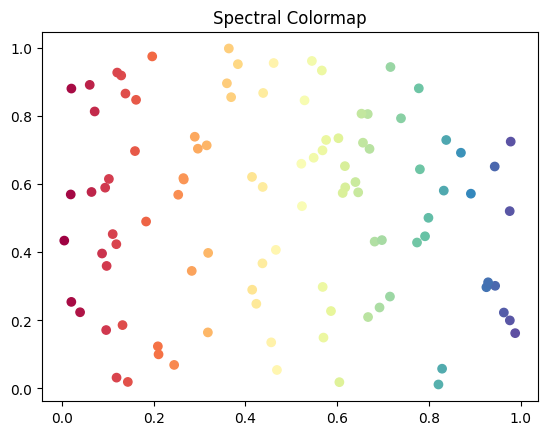

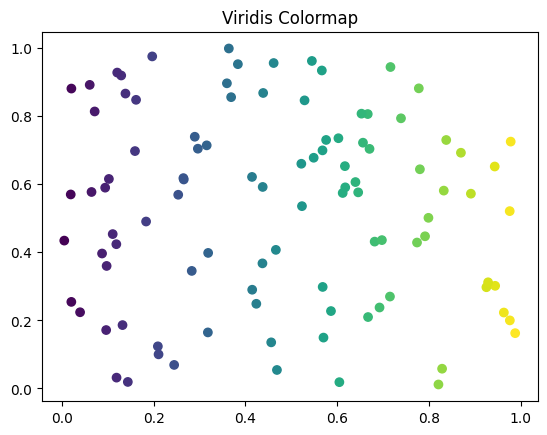

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# 랜덤 데이터 생성
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)

# Spectral 색상맵 사용
plt.scatter(x, y, c=x, cmap='Spectral')
plt.title('Spectral Colormap')
plt.show()

# viridis 색상맵 사용
plt.scatter(x, y, c=x, cmap='viridis')
plt.title('Viridis Colormap')
plt.show()